# GRIP Internship - The Sparks Foundation


# Author: Harshit Singh 

Task 1 - Data Science and Business Analytics

# PREDICTION USING SUPERVISED LEARNING

What will be predicted score if a student studies for 9.25 hrs/ day?

In [4]:
#importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data using pandas method read_csv
url = "http://bit.ly/w-data"
sdata = pd.read_csv(url)
sdata
print(sdata,"\n\nData imported successfully")

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86 

Data imported successfully


In [3]:
sdata.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# Checking Last 5 values
sdata.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
sdata.isnull().sum() #checking for missing values

Hours     0
Scores    0
dtype: int64

In [8]:
# Checking the shape of the Dataset
sdata.shape

(25, 2)

In [9]:
sdata.dtypes #inspecting data type

Hours     float64
Scores      int64
dtype: object

In [11]:
#correcting data type for accurate results
sdata['Scores']=sdata['Scores'].astype('float')
sdata.dtypes

Hours     float64
Scores    float64
dtype: object

In [10]:
# Columns names in dataset
sdata.columns

Index(['Hours', 'Scores'], dtype='object')

In [13]:
sdata.corr()  #checking the correlation to confirm strong relationship

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Describe method tells all the detailed Analysis of the dataset

In [15]:
sdata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The correlation coefficient is very close to 1, hence it indicates a very strong positive relation

For Visulaing our data we use matplotlib library and using this we plot Scatter Plot and from seaborn we plot histogram for Hours and Scores

# Data Visualization

Text(0.5, 0, 'Hours Studied')

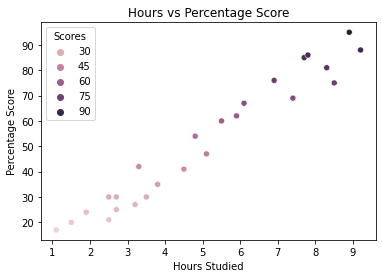

In [16]:
#plotting the distribution of Scores against the hours studied for each student
sns.scatterplot(x='Hours',y='Scores',data=sdata, hue='Scores')
plt.title('Hours vs Percentage Score')
plt.ylabel('Percentage Score')
plt.xlabel('Hours Studied')

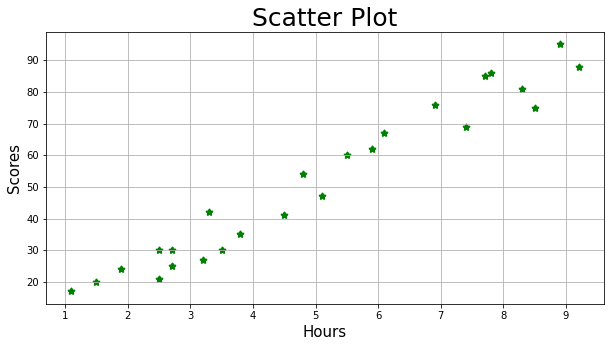

In [17]:
plt.figure(figsize = (10,5))
plt.grid()
plt.scatter(sdata['Hours'],sdata['Scores'],marker = '*',color = 'r',edgecolors = 'g',linewidths=2)
plt.title("Scatter Plot",fontsize = 25)
plt.xlabel("Hours",fontsize = 15)
plt.ylabel("Scores",fontsize = 15)
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


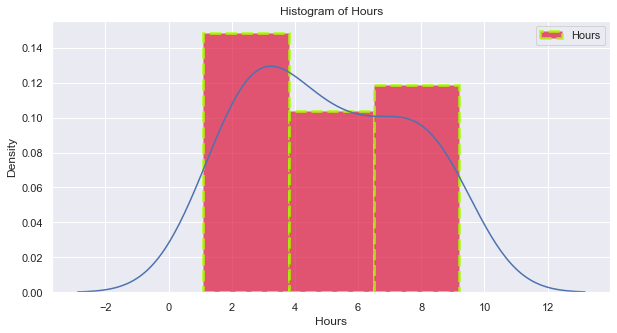

In [31]:
plt.figure(figsize = (10,5))
sns.set()
sns.distplot(sdata["Hours"],label = "Hours",
             hist_kws={'color':'#DC143C','edgecolor':'#aaff00','linewidth':3,'linestyle':'--','alpha':0.7})
plt.title("Histogram of Hours")
plt.legend()
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


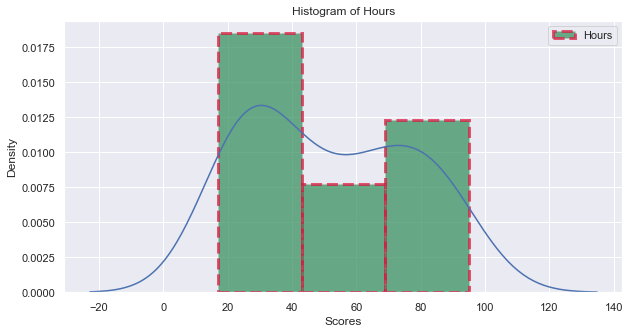

In [32]:
plt.figure(figsize = (10,5))
sns.set()
sns.distplot(sdata["Scores"],label = "Hours",
             hist_kws={'color':'seagreen','edgecolor':'crimson','linewidth':3,'linestyle':'--','alpha':0.7})
plt.title("Histogram of Hours")
plt.legend()
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

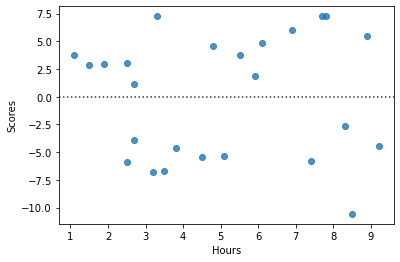

In [18]:
#confirming the linear relationship with a residual plot
sns.residplot(x='Hours',y='Scores',data=sdata)

# Splitting our our Dataset(Hours and Scores) into x and y variables

In [34]:
x = sdata.iloc[:,:-1].values
y = sdata.iloc[:,-1].values

An evenly distributed residual plots proves the linear relationship between Hours Studied and Percentage of Score

Preparing the data for training into the model

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

In [20]:
X=sdata['Hours'].values.reshape(-1,1)
Y=sdata['Scores'].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

# Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [22]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train, Y_train) 

print("Data Trained.")

Data Trained.


<AxesSubplot:>

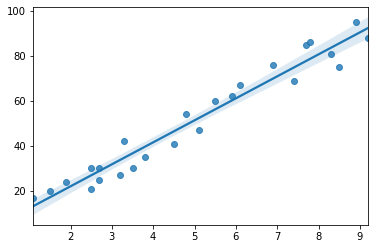

In [23]:
#Plotting the regression plot to visualise the target array
sns.regplot(x=X,y=Y)

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [24]:
print(X_test) # Testing data - In Hours
Y_pred = lm.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


<AxesSubplot:ylabel='Density'>

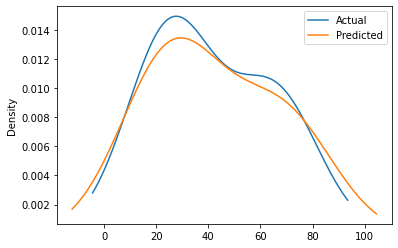

In [26]:
#visually representing the accuracy of predicted values
df.plot(kind='kde')

In [41]:
#trying with user defined data
Hours= input("Enter the no of hours you have studied: ")
hour=float(Hours)
ar=[[hour]]
user_pred=lm.predict(ar)
score=user_pred[0]
print("You will score around ",score)

Enter the no of hours you have studied: 9.25
You will score around  93.69173248737539


# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [37]:
from sklearn import metrics  
print('Root Mean Squared Error is: ',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error is: ',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Root Mean Squared Error is:  21.598769307217456
Root Mean Squared Error is:  4.647447612100373
